Balanced accuracies Gemma 7b acc:0.6259038752976834, Llama3 acc: 0.5745886555531501, mistral acc: 0.6519592985494695, phi 3 med acc: 0.5935970989391643, baseline acc: 0.5


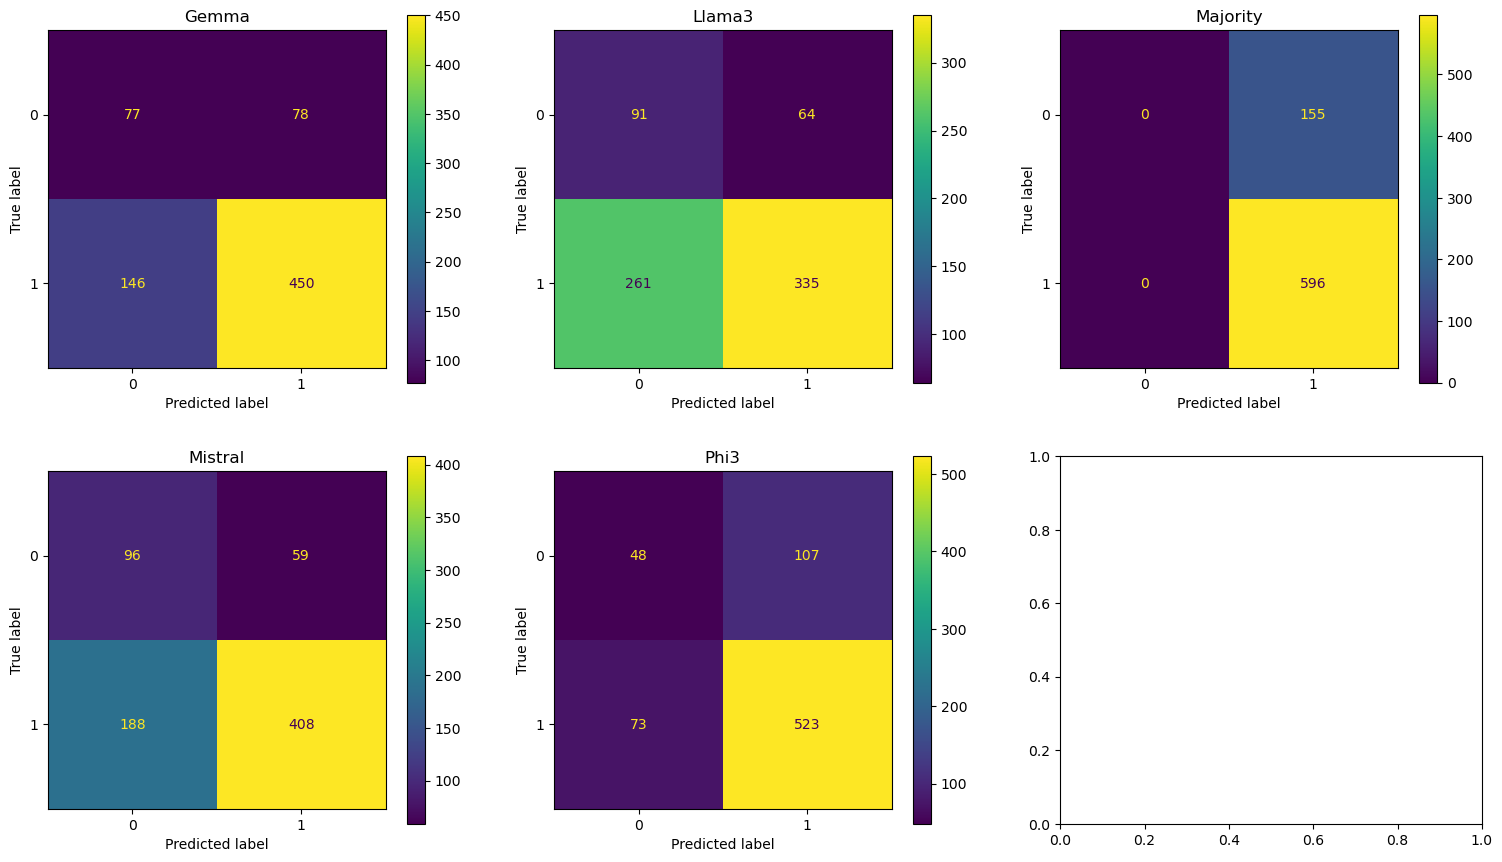

In [14]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
#df_child_guess = df_child_guess[df_child_guess["is_valid"] == 1]
#df_child_guess.groupby(["child_age"])["is_valid"].count()
#print(len(df_child_guess))
baseline = [1]*len(df_child_guess["is_valid"])
#print(f"Gemma 7b acc:{accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"])}, Llama3 acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"])}, mistral acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"])}, phi 3 med acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["phi3:medium"])},")
print("Balanced accuracies Gemma 7b acc:{}, Llama3 acc: {}, mistral acc: {}, phi 3 med acc: {}, baseline acc: {}".format(balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"]),balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["phi3:medium"]), balanced_accuracy_score(df_child_guess["is_valid"], baseline)))

fig, axs = plt.subplots(2,3)

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gemma:7b"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,0])
axs[0, 0].set_title('Gemma')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["llama3"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,1])
axs[0, 1].set_title('Llama3')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["mistral"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,0])
axs[1, 0].set_title('Mistral')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["phi3:medium"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,1])
axs[1, 1].set_title('Phi3')

cm = confusion_matrix(df_child_guess["is_valid"], baseline)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,2])
axs[0, 2].set_title('Majority')
fig.set_size_inches(18.5, 10.5)
#plt.figure(figsize=(20, 6), dpi=80)

plt.show()

#print(df_concat["file_id"].unique())
#df_2 = df_concat[df_concat["file_id"] == "ID_2"]

#df_concat = df_concat[df_concat["is_valid"] == 0]
#df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())

#print(len(df_concat))


#df_parent_guess = df_concat[df_concat["guesser_type"]=="parent"]
#print(df_parent_guess["file_id"].unique())
#print(df_child_guess, df_parent_guess)

#df_parent_guess.groupby(["child_age", "file_id"])["is_valid"].count()



In [13]:
csv_files = glob("data/chica_f2f/*.csv")
df_concat = pd.concat([pd.read_csv(f, delimiter=';') for f in csv_files], ignore_index=True)

#print(len(df_concat))

#print(df_concat["file_id"].unique())
df_2 = df_concat[(df_concat["file_id"] == "ID_2") & (df_concat["is_valid"] == 0)]
df_2["guesser_type"] = df_2["guesser_type"].apply(lambda x: x.strip())
df_2[df_2["guesser_type"]=="child"]

/var/folders/5h/4gmv4knx5t97bwcdqvv685gc0000gn/T/ipykernel_35377/976572173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["guesser_type"] = df_2["guesser_type"].apply(lambda x: x.strip())


,file_id,child_age,target_word,guesser_type,speaker,original_text,auto_translation,manual_translation,missing_transcript,useful_context,is_dubious,is_relevant,validity_check,is_valid,speaker
2784,ID_2,7,candy,child,child,Est-ce que c'est un tableau ?,Is this a painting?,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
2792,ID_2,7,candy,child,child,Est-ce que c'est une assiette ?,Is this a plate?,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
2804,ID_2,7,candy,child,child,Une tarte.. Sucrée,A tart... Sweet,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
2873,ID_2,7,A bump,child,child,Est-ce que c'est tes lunettes ?,Are those your glasses?,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
2880,ID_2,7,A bump,child,child,Des boucles d'oreilles.,Earings.,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
2960,ID_2,7,cactus,child,child,Est-ce que ça tombe ?,Does it fall?,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
2971,ID_2,7,cactus,child,child,Est-ce que c'est un champignon ?,Is it a mushroom?,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
2973,ID_2,7,cactus,child,child,Est-ce que c'est du chou ?,Is it cabbage?,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
2984,ID_2,7,cactus,child,child,Est-ce que c'est dur ?,Is it hard?,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
2996,ID_2,7,cactus,child,child,Les orchidées.,Orchids.,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN


Balanced accuracies Gemma 7b acc:0.6391967958432561, Llama3 acc: 0.5607869668759472, mistral acc: 0.615317168218229, phi 3 med acc: 0.5784368911019702, baseline acc: 0.5, gpt4o acc: 0.6800497943277766


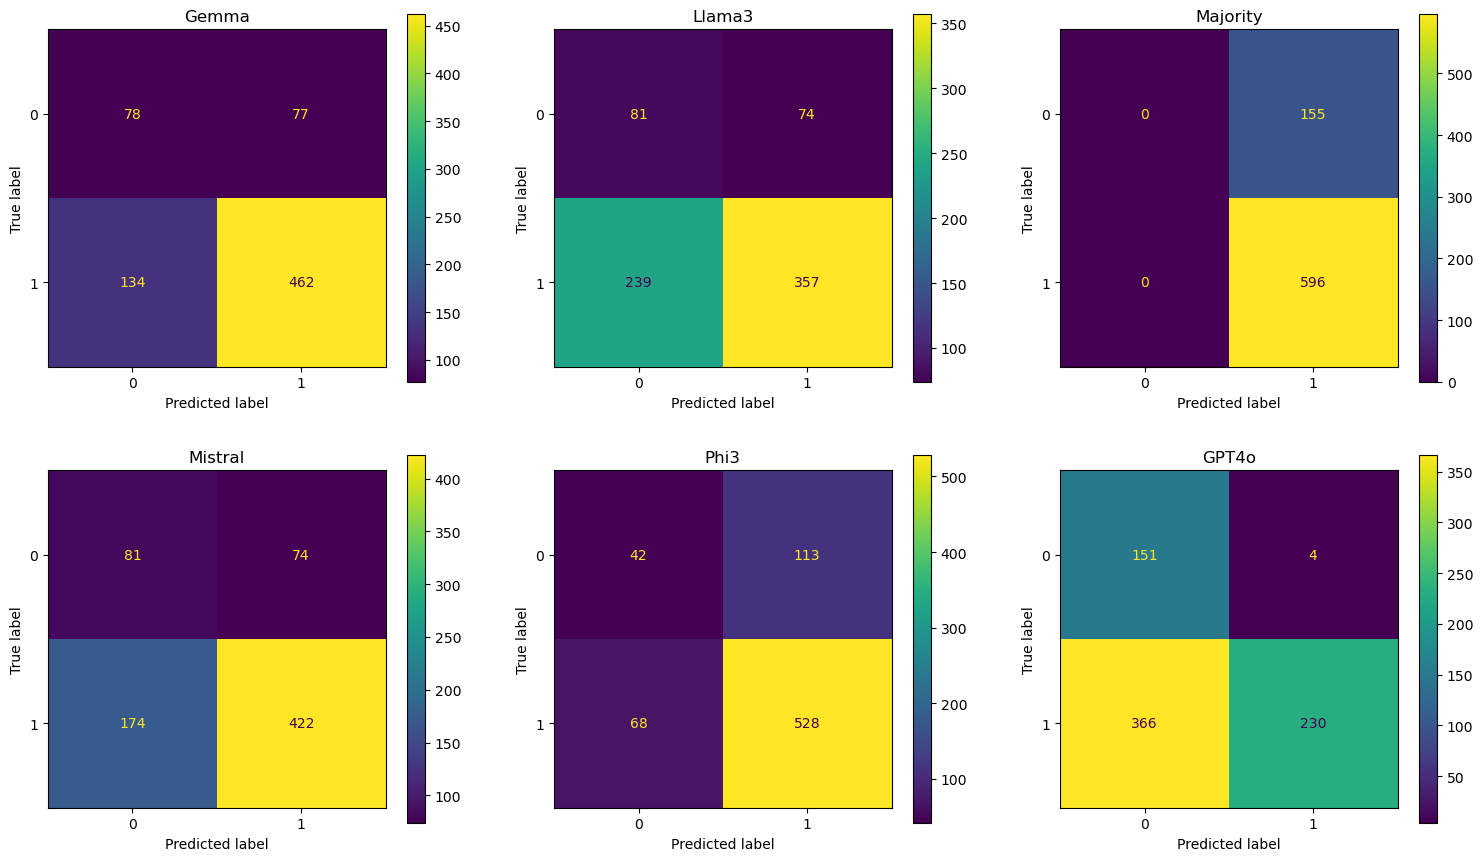

In [1]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

csv_files = glob("data/prompts/verbose_prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
#df_child_guess = df_child_guess[df_child_guess["is_valid"] == 1]
#df_child_guess.groupby(["child_age"])["is_valid"].count()
#print(len(df_child_guess))
baseline = [1]*len(df_child_guess["is_valid"])
#print(f"Gemma 7b acc:{accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"])}, Llama3 acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"])}, mistral acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"])}, phi 3 med acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["phi3:medium"])},")
print("Balanced accuracies Gemma 7b acc:{}, Llama3 acc: {}, mistral acc: {}, phi 3 med acc: {}, baseline acc: {}, gpt4o acc: {}".format(balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"]),balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["phi3:medium"]), balanced_accuracy_score(df_child_guess["is_valid"], baseline), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gpt4o"])))

fig, axs = plt.subplots(2,3)

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gemma:7b"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,0])
axs[0, 0].set_title('Gemma')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["llama3"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,1])
axs[0, 1].set_title('Llama3')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["mistral"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,0])
axs[1, 0].set_title('Mistral')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["phi3:medium"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,1])
axs[1, 1].set_title('Phi3')

cm = confusion_matrix(df_child_guess["is_valid"], baseline)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,2])
axs[0, 2].set_title('Majority')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gpt4o"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,2])
axs[1, 2].set_title('GPT4o')
fig.set_size_inches(18.5, 10.5)
#plt.figure(figsize=(20, 6), dpi=80)

plt.show()

#print(df_concat["file_id"].unique())
#df_2 = df_concat[df_concat["file_id"] == "ID_2"]

#df_concat = df_concat[df_concat["is_valid"] == 0]
#df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())

#print(len(df_concat))


#df_parent_guess = df_concat[df_concat["guesser_type"]=="parent"]
#print(df_parent_guess["file_id"].unique())
#print(df_child_guess, df_parent_guess)

#df_parent_guess.groupby(["child_age", "file_id"])["is_valid"].count()



Balanced accuracies Gemma 7b acc:0.6231712942623671, mistral-masked acc: 0.5897273965380898, mistral acc: 0.654737061769616, mistral-fewshot acc: 0.6476089535190229, baseline acc: 0.5, gpt4o acc: 0.707456506458132, gpt4o-def acc: 0.699208110007908


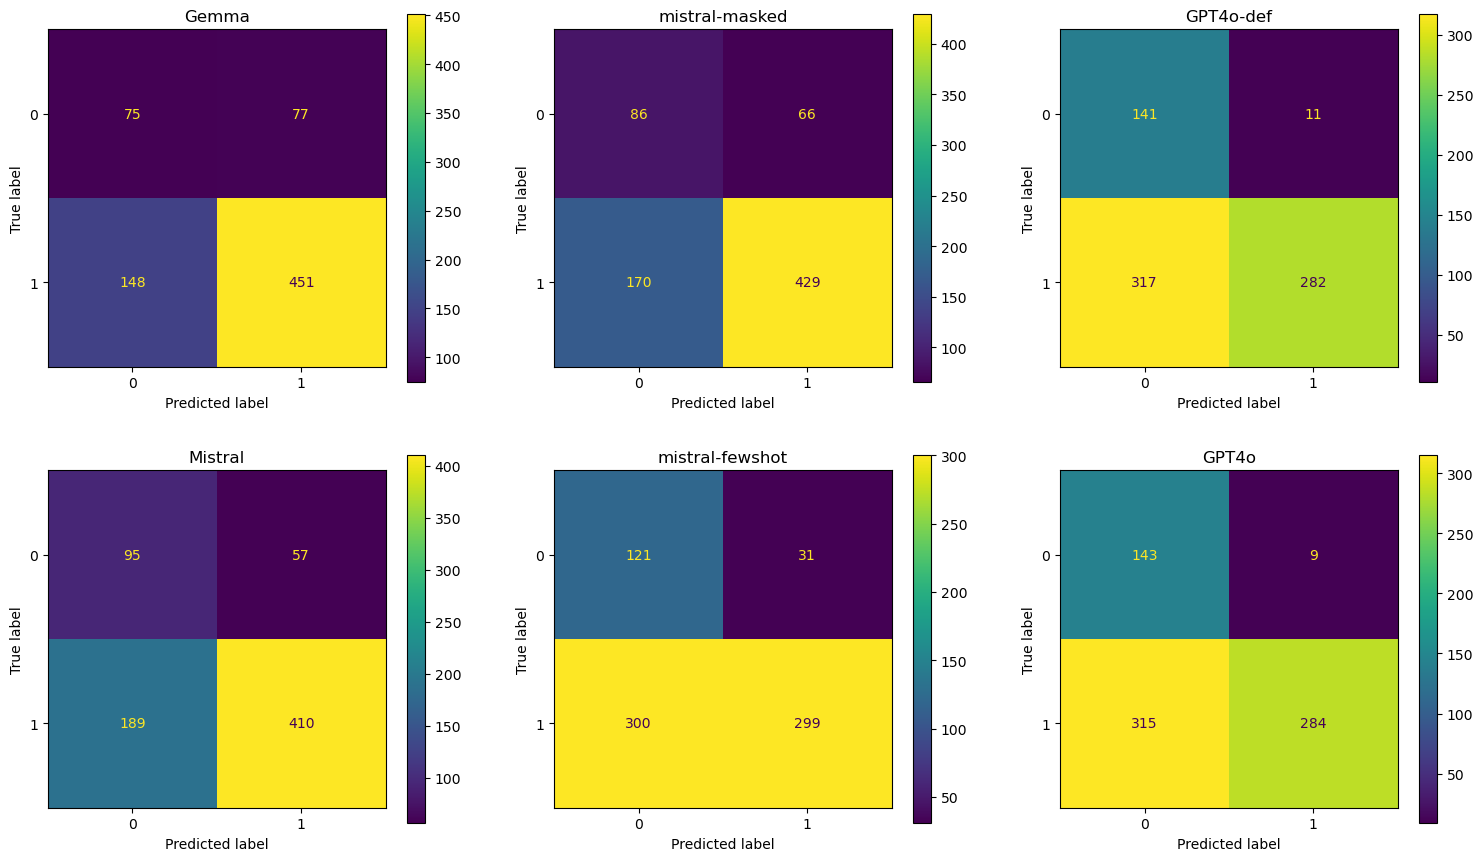

In [50]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
#df_child_guess = df_child_guess[df_child_guess["is_valid"] == 1]
#df_child_guess.groupby(["child_age"])["is_valid"].count()
#print(len(df_child_guess))
baseline = [1]*len(df_child_guess["is_valid"])
#print(f"Gemma 7b acc:{accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"])}, Llama3 acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"])}, mistral acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"])}, phi 3 med acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["phi3:medium"])},")
print("Balanced accuracies Gemma 7b acc:{}, mistral-masked acc: {}, mistral acc: {}, mistral-fewshot acc: {}, baseline acc: {}, gpt4o acc: {}, gpt4o-def acc: {}".format(balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"]),balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral-fewshot"]), balanced_accuracy_score(df_child_guess["is_valid"], baseline), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gpt4o"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gpt4o:def"])))

fig, axs = plt.subplots(2,3)

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gemma:7b"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,0])
axs[0, 0].set_title('Gemma')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["mistral-masked"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,1])
axs[0, 1].set_title('mistral-masked')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["mistral"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,0])
axs[1, 0].set_title('Mistral')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["mistral-fewshot"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,1])
axs[1, 1].set_title('mistral-fewshot')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gpt4o:def"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,2])
axs[0, 2].set_title('GPT4o-def')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gpt4o"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,2])
axs[1, 2].set_title('GPT4o')
fig.set_size_inches(18.5, 10.5)
#plt.figure(figsize=(20, 6), dpi=80)

plt.show()

#print(df_concat["file_id"].unique())
#df_2 = df_concat[df_concat["file_id"] == "ID_2"]

#df_concat = df_concat[df_concat["is_valid"] == 0]
#df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())

#print(len(df_concat))


#df_parent_guess = df_concat[df_concat["guesser_type"]=="parent"]
#print(df_parent_guess["file_id"].unique())
#print(df_child_guess, df_parent_guess)

#df_parent_guess.groupby(["child_age", "file_id"])["is_valid"].count()



   child_age  initiate_repair   0
0          7              0.0  18
1          7              1.0  26
2          9              0.0  60
3          9              1.0  21
4         11              0.0  20
5         11              1.0  11


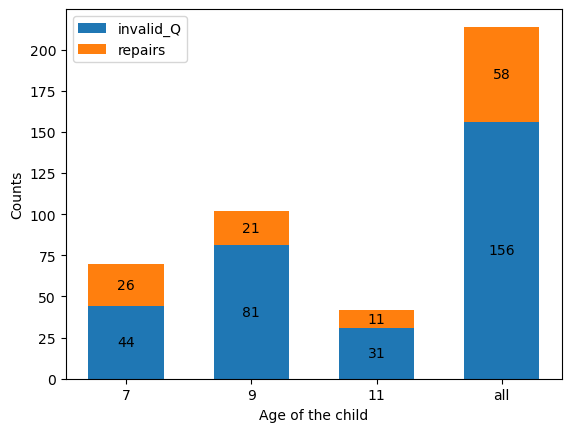

In [11]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f, delimiter=';') for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
df_child_guess = df_child_guess[df_child_guess["is_valid"] == 0]
temp_df = df_child_guess.groupby(["child_age", "initiate_repair"]).size().reset_index()
#print(temp_df)
temp_df = temp_df.rename(columns={0: "values"})
#print(len(df_child_guess))

ages = ["7", "9", "11", "all"]

counts = {"invalid_Q": [], "repairs":[]}

for age in sorted(temp_df["child_age"].unique()):
    counts["invalid_Q"].append(temp_df[temp_df["child_age"] == age]["values"].sum())
    counts["repairs"].append(temp_df.loc[(temp_df['child_age'] == age) & (temp_df['initiate_repair'] == 1), 'values'].values[0])

counts["invalid_Q"].append(temp_df["values"].sum())
counts["repairs"].append(temp_df[temp_df["initiate_repair"] == 1]["values"].sum())

width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(4)

for item, item_count in counts.items():
    p = ax.bar(ages, item_count, width, label=item, bottom=bottom)
    bottom += item_count

    ax.bar_label(p, label_type='center')

#ax.set_title('Number of penguins by sex')
ax.set_xlabel('Age of the child')
ax.set_ylabel('Counts')
ax.legend()

plt.show()

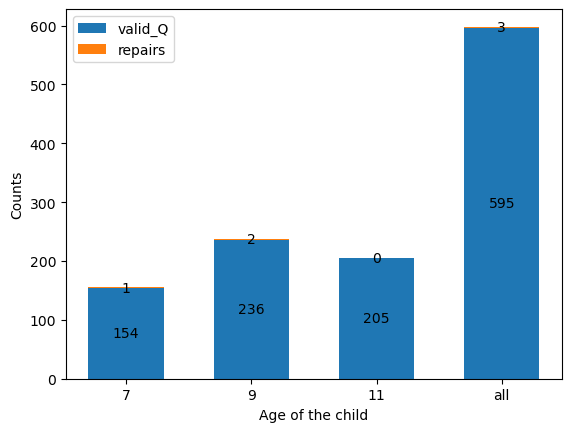

In [15]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f, delimiter=';') for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
df_child_guess = df_child_guess[df_child_guess["is_valid"] == 1]
temp_df = df_child_guess.groupby(["child_age", "initiate_repair"]).size().reset_index()
#print(temp_df)
temp_df = temp_df.rename(columns={0: "values"})
#print(len(df_child_guess))

ages = ["7", "9", "11", "all"]

counts = {"valid_Q": [], "repairs":[]}

for age in sorted(temp_df["child_age"].unique()):
    counts["valid_Q"].append(temp_df[temp_df["child_age"] == age]["values"].sum())
    if temp_df.loc[temp_df['child_age'] == age, 'initiate_repair'].isin([1]).any():
        counts["repairs"].append(temp_df.loc[(temp_df['child_age'] == age) & (temp_df['initiate_repair'] == 1), 'values'].values[0])
    else:
        counts["repairs"].append(0)
    

counts["valid_Q"].append(temp_df["values"].sum())
counts["repairs"].append(temp_df[temp_df["initiate_repair"] == 1]["values"].sum())

width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(4)

for item, item_count in counts.items():
    p = ax.bar(ages, item_count, width, label=item, bottom=bottom)
    bottom += item_count

    ax.bar_label(p, label_type='center')

#ax.set_title('Number of penguins by sex')
ax.set_xlabel('Age of the child')
ax.set_ylabel('Counts')
ax.legend()

plt.show()

/var/folders/5h/4gmv4knx5t97bwcdqvv685gc0000gn/T/ipykernel_241/1595693502.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["error_type"] = df["error_type"].apply(lambda x: x.split(","))
/var/folders/5h/4gmv4knx5t97bwcdqvv685gc0000gn/T/ipykernel_241/1595693502.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["error_type"] = df["error_type"].apply(lambda x: [item.strip() for item in x])
/var/folders/5h/4gmv4knx5t97bwcdqvv685gc0000gn/T/ipykernel_241/1595693502.py:16: SettingWithCopyWarning: 
A va

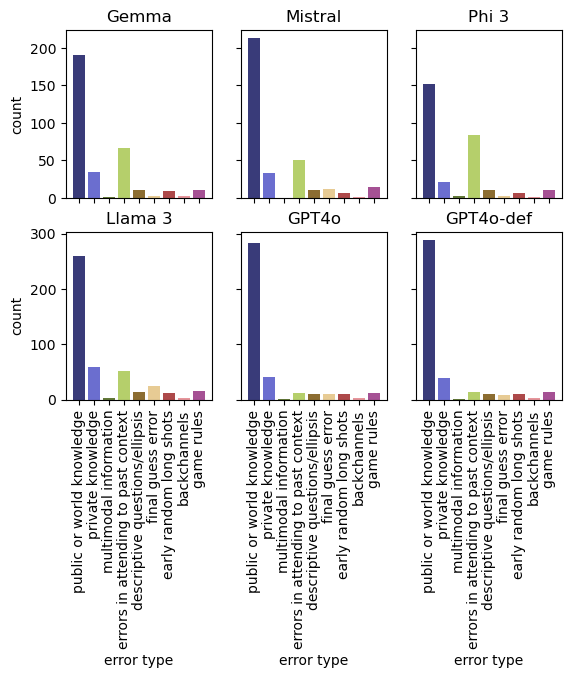

In [53]:
error_dict = {
    '1': "public or world knowledge",
    '2': "private knowledge",
    '3': "multimodal information",
    '4': "errors in attending to past context",
    '5': "descriptive questions/ellipsis",
    '6': "final guess error",
    '7': "early random long shots",
    '8': "backchannels",
    '9': "game rules"
}

model_list = ["gemma:7b", "mistral", "llama3", "phi3:medium", "gpt4o", "gpt4o:def"]

def get_counts(df):
    df["error_type"] = df["error_type"].apply(lambda x: x.split(","))
    df["error_type"] = df["error_type"].apply(lambda x: [item.strip() for item in x])
    
    # Get the count of each individual number
    number_counts = df['error_type'].explode().value_counts()
    #print(number_counts)
    y = []

    for error in list(error_dict.keys()):
        if error in number_counts.index:
            y.append(number_counts[error])
        else:
            y.append(0)
    return y
        

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f, delimiter=';') for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]


df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
#print(len(df_child_guess))
    

fig, axs = plt.subplots(2,3, sharey='row')

#plt.figure(figsize=(20,6))


num_colors = len(error_dict)
x1 = list(error_dict.keys())
labels = list(error_dict.values())
x= np.arange(num_colors)
cm = plt.get_cmap('tab20b')
colors = [cm(1.*i/num_colors) for i in range(num_colors)]

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["gemma:7b"]]
y1 = get_counts(temp_df)
#print(f"x:{x1}, y:{y1}, label:{labels}, color:{colors}")
axs[0,0].bar(x1, y1, label=labels, color=colors)
axs[0, 0].set_title('Gemma')
#axs[0,0].legend(title='error labels', loc='upper right')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["mistral"]]
y2 = get_counts(temp_df)
axs[0,1].bar(x1, y2, label=labels, color=colors)
axs[0, 1].set_title('Mistral')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["llama3"]]
y3 = get_counts(temp_df)
axs[1,0].bar(x1, y3, label=labels, color=colors)
axs[1, 0].set_title('Llama 3')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["phi3:medium"]]
y4 = get_counts(temp_df)
axs[0,2].bar(x1, y4, label=labels, color=colors)
axs[0, 2].set_title('Phi 3')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["gpt4o"]]
y5 = get_counts(temp_df)
axs[1,1].bar(x1, y5, label=labels, color=colors)
axs[1, 1].set_title('GPT4o')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["gpt4o:def"]]
y6 = get_counts(temp_df)
axs[1,2].bar(x1, y6, label=labels, color=colors)
axs[1, 2].set_title('GPT4o-def')


for ax in fig.get_axes():
    ax.set(xlabel='error type', ylabel='count')
    ax.label_outer()
    ax.set_xticks(x)
    ax.set_xticklabels(list(error_dict.values()), rotation=90)


plt.show()


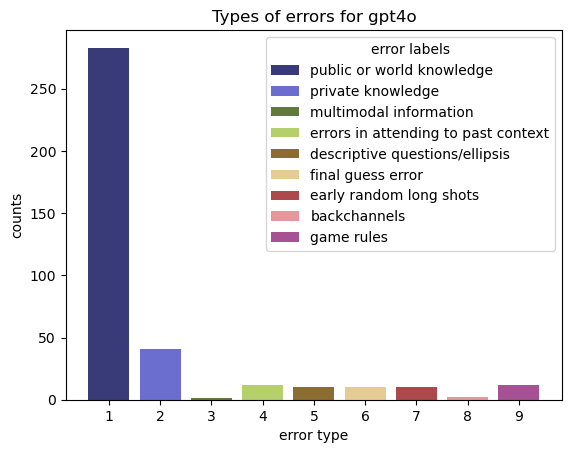

<Figure size 640x480 with 0 Axes>

In [34]:
error_dict = {
    '1': "public or world knowledge",
    '2': "private knowledge",
    '3': "multimodal information",
    '4': "errors in attending to past context",
    '5': "descriptive questions/ellipsis",
    '6': "final guess error",
    '7': "early random long shots",
    '8': "backchannels",
    '9': "game rules"
}


csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f, delimiter=';') for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]


df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
#print(len(df_child_guess))
df_child_guess = df_child_guess[df_child_guess["is_valid"] != df_child_guess["gpt4o"]]
df_child_guess["error_type"] = df_child_guess["error_type"].apply(lambda x: x.split(","))
df_child_guess["error_type"] = df_child_guess["error_type"].apply(lambda x: [item.strip() for item in x])


# Get the count of each individual number
number_counts = df_child_guess['error_type'].explode().value_counts().sort_index()
labels, x, y = [], [], []

for item, count in number_counts.items():
    x.append(item)
    y.append(count)
    labels.append(error_dict[item])
    

#print(number_counts)

fig, ax = plt.subplots()

num_colors = len(number_counts)
cm = plt.get_cmap('tab20b')

fig = plt.figure()
colors = [cm(1.*i/num_colors) for i in range(num_colors)]

ax.bar(x, y, label=labels, color=colors)

ax.set_ylabel('counts')
ax.set_xlabel('error type')
ax.set_title('Types of errors for gpt4o')
ax.legend(title='error labels')

plt.show()


In [2]:
import pandas as pd
from glob import glob

csv_files = glob("data/prompts/abdellah/*.csv")
df_concat = pd.concat([pd.read_csv(f, delimiter=';') for f in csv_files], ignore_index=True)


#df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_concat.loc[df_concat["guesser_type"] == 'parent', 'validity_check'] = ''

df_concat.to_csv("data/prompts/abdellah/child_guesser.csv")

/var/folders/5h/4gmv4knx5t97bwcdqvv685gc0000gn/T/ipykernel_7589/3001185813.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_concat.loc[df_concat["guesser_type"] == 'parent', 'validity_check'] = ''


In [47]:
from sklearn.metrics import cohen_kappa_score
import numpy as np


df_abd = pd.read_csv("data/prompts/abdellah/agreement.csv", delimiter=';')


#print(len(df_abd))

#df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
#df_child_guess = df_concat[df_concat["guesser_type"]=="child"]
df_abd = df_abd[~df_abd["abd_anno"].isna()]
#df_concat = df_concat[~df_concat["is_valid"].isna()]
#print(len(df_abd))
#print(df_abd["abd_anno"].unique())
df_abd = df_abd[df_abd["abd_anno"] != '?']
df_abd = df_abd[~df_abd["is_valid"].isna()]
#print(len(df_abd))
#df_abd["abd_anno"].value_counts()
print(cohen_kappa_score(pd.to_numeric(df_abd["abd_anno"]), pd.to_numeric(df_abd["is_valid"])))
#print(df_concat["is_valid"].unique())
#print(len(df_concat))


0.5237113402061855


In [57]:
df = pd.read_csv("data/prompts/ID_13_child_guesser.csv", delimiter=';')
df.to_csv("data/prompts/ID_13_child_guesser.csv", index=False)

751
60
Balanced accuracies Gemma 7b acc:0.7327586206896551, mistral-masked acc: 0.5517241379310345, mistral acc: 0.5948275862068966, mistral-fewshot acc: 0.6896551724137931, baseline acc: 0.5, gpt4o acc: 0.46551724137931033, gpt4o-def acc: 0.46551724137931033
accuracies Gemma 7b acc:0.48333333333333334, mistral-masked acc: 0.6, mistral acc: 0.6833333333333333, mistral-fewshot acc: 0.8666666666666667, baseline acc: 0.03333333333333333, gpt4o acc: 0.9, gpt4o-def acc: 0.9


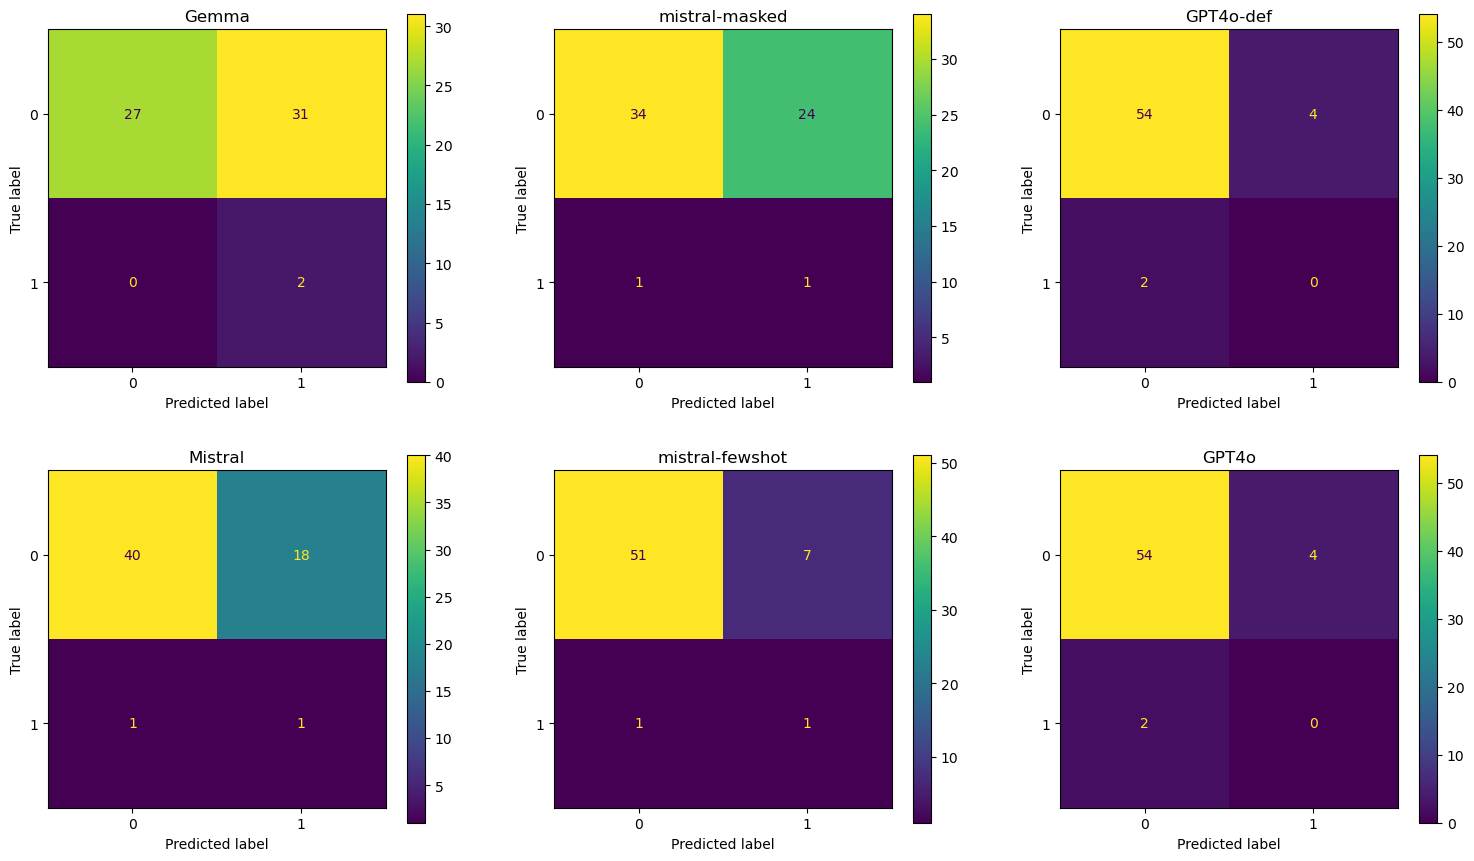

In [58]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
print(len(df_child_guess))
df_child_guess = df_child_guess[df_child_guess["initiate_repair"] == 1]
#df_child_guess.groupby(["child_age"])["is_valid"].count()
print(len(df_child_guess))
baseline = [1]*len(df_child_guess["is_valid"])
#print(f"Gemma 7b acc:{accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"])}, Llama3 acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"])}, mistral acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"])}, phi 3 med acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["phi3:medium"])},")
print("Balanced accuracies Gemma 7b acc:{}, mistral-masked acc: {}, mistral acc: {}, mistral-fewshot acc: {}, baseline acc: {}, gpt4o acc: {}, gpt4o-def acc: {}".format(balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"]),balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral-fewshot"]), balanced_accuracy_score(df_child_guess["is_valid"], baseline), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gpt4o"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gpt4o:def"])))
print("accuracies Gemma 7b acc:{}, mistral-masked acc: {}, mistral acc: {}, mistral-fewshot acc: {}, baseline acc: {}, gpt4o acc: {}, gpt4o-def acc: {}".format(accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"]),accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"]), accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"]), accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral-fewshot"]), accuracy_score(df_child_guess["is_valid"], baseline), accuracy_score(df_child_guess["is_valid"], df_child_guess["gpt4o"]), accuracy_score(df_child_guess["is_valid"], df_child_guess["gpt4o:def"])))

fig, axs = plt.subplots(2,3)

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gemma:7b"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,0])
axs[0, 0].set_title('Gemma')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["mistral-masked"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,1])
axs[0, 1].set_title('mistral-masked')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["mistral"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,0])
axs[1, 0].set_title('Mistral')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["mistral-fewshot"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,1])
axs[1, 1].set_title('mistral-fewshot')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gpt4o:def"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,2])
axs[0, 2].set_title('GPT4o-def')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gpt4o"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,2])
axs[1, 2].set_title('GPT4o')
fig.set_size_inches(18.5, 10.5)
#plt.figure(figsize=(20, 6), dpi=80)

plt.show()

#print(df_concat["file_id"].unique())
#df_2 = df_concat[df_concat["file_id"] == "ID_2"]

#df_concat = df_concat[df_concat["is_valid"] == 0]
#df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())

#print(len(df_concat))


#df_parent_guess = df_concat[df_concat["guesser_type"]=="parent"]
#print(df_parent_guess["file_id"].unique())
#print(df_child_guess, df_parent_guess)

#df_parent_guess.groupby(["child_age", "file_id"])["is_valid"].count()



In [56]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
#print(len(df_child_guess))
df_child_guess = df_child_guess[(df_child_guess["initiate_repair"] == 1) & (df_child_guess["is_valid"] == 1)]
#df_child_guess.groupby(["child_age"])["is_valid"].count()
#print(len(df_child_guess))
df_child_guess

,file_id,child_age,target_word,guesser_type,speaker,original_text,auto_translation,manual_translation,missing_transcript,useful_context,...,initiate_repair,error_type,gemma:7b,mistral,llama3,phi3:medium,gpt4o,gpt4o:def,mistral-masked,mistral-fewshot
555,ID_5,7,Pikachu,child,child,Dragonfeu ?,Dragonfire?,NaN,NaN,NaN,...,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3892,ID_13,9,Binoculars,child,child,Un livre ?,A book ?,NaN,NaN,NaN,...,1.0,1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3967,ID_13,9,Binoculars,child,child,Un correcteur de vue.,A vision corrector.,NaN,NaN,NaN,...,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
